## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  86.488392   273.566013  0.896045   9.067557  1.214655
1  99.066556  1112.309984  0.817022  10.239627  1.609602
2  29.742642  1236.237496  0.638157   1.730054  1.510726
3  18.305299   676.846519  0.443564   6.628572  1.613546
4  47.475149   536.172008  0.655307   3.986380  1.348275


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8922701	total: 62ms	remaining: 1m 1s
1:	learn: 0.8857587	total: 62.4ms	remaining: 31.2s
2:	learn: 0.8787993	total: 62.7ms	remaining: 20.9s
3:	learn: 0.8719173	total: 63.2ms	remaining: 15.7s
4:	learn: 0.8639768	total: 63.5ms	remaining: 12.6s
5:	learn: 0.8558914	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8479385	total: 64.2ms	remaining: 9.1s
7:	learn: 0.8408131	total: 64.4ms	remaining: 7.99s
8:	learn: 0.8322122	total: 64.8ms	remaining: 7.13s
9:	learn: 0.8237848	total: 65ms	remaining: 6.44s
10:	learn: 0.8174703	total: 65.4ms	remaining: 5.88s
11:	learn: 0.8104379	total: 65.8ms	remaining: 5.41s
12:	learn: 0.8039669	total: 66ms	remaining: 5.01s
13:	learn: 0.7972761	total: 66.3ms	remaining: 4.67s
14:	learn: 0.7904941	total: 66.6ms	remaining: 4.37s
15:	learn: 0.7837668	total: 66.9ms	remaining: 4.12s
16:	learn: 0.7766465	total: 67.2ms	remaining: 3.89s
17:	learn: 0.7686403	total: 67.7ms	remaining: 3.69s
18:	learn: 0.7658453	total: 68.1ms	remaining: 3.52s

69:	learn: 0.5379481	total: 91.6ms	remaining: 1.22s
70:	learn: 0.5349570	total: 92.3ms	remaining: 1.21s
71:	learn: 0.5310767	total: 92.7ms	remaining: 1.19s
72:	learn: 0.5274868	total: 93.2ms	remaining: 1.18s
73:	learn: 0.5244302	total: 93.6ms	remaining: 1.17s
74:	learn: 0.5213815	total: 94.2ms	remaining: 1.16s
75:	learn: 0.5183870	total: 94.5ms	remaining: 1.15s
76:	learn: 0.5153124	total: 95ms	remaining: 1.14s
77:	learn: 0.5116503	total: 95.5ms	remaining: 1.13s
78:	learn: 0.5083262	total: 96ms	remaining: 1.12s
79:	learn: 0.5057201	total: 96.3ms	remaining: 1.11s
80:	learn: 0.5024483	total: 96.8ms	remaining: 1.1s
81:	learn: 0.4994798	total: 97.4ms	remaining: 1.09s
82:	learn: 0.4962104	total: 97.8ms	remaining: 1.08s
83:	learn: 0.4931650	total: 98.3ms	remaining: 1.07s
84:	learn: 0.4901626	total: 98.8ms	remaining: 1.06s
85:	learn: 0.4875901	total: 99.2ms	remaining: 1.05s
86:	learn: 0.4851361	total: 99.8ms	remaining: 1.05s
87:	learn: 0.4826077	total: 100ms	remaining: 1.04s
88:	learn: 0.48000

276:	learn: 0.2273833	total: 183ms	remaining: 478ms
277:	learn: 0.2271279	total: 184ms	remaining: 477ms
278:	learn: 0.2264504	total: 184ms	remaining: 476ms
279:	learn: 0.2260332	total: 184ms	remaining: 474ms
280:	learn: 0.2257549	total: 185ms	remaining: 473ms
281:	learn: 0.2253899	total: 185ms	remaining: 472ms
282:	learn: 0.2249638	total: 186ms	remaining: 471ms
283:	learn: 0.2238567	total: 186ms	remaining: 469ms
284:	learn: 0.2232151	total: 187ms	remaining: 468ms
285:	learn: 0.2224520	total: 187ms	remaining: 467ms
286:	learn: 0.2219101	total: 187ms	remaining: 465ms
287:	learn: 0.2214686	total: 188ms	remaining: 464ms
288:	learn: 0.2210622	total: 188ms	remaining: 463ms
289:	learn: 0.2206715	total: 189ms	remaining: 462ms
290:	learn: 0.2203402	total: 189ms	remaining: 461ms
291:	learn: 0.2200477	total: 189ms	remaining: 459ms
292:	learn: 0.2197256	total: 190ms	remaining: 458ms
293:	learn: 0.2188755	total: 190ms	remaining: 457ms
294:	learn: 0.2181255	total: 191ms	remaining: 456ms
295:	learn: 

473:	learn: 0.1305641	total: 274ms	remaining: 304ms
474:	learn: 0.1297885	total: 274ms	remaining: 303ms
475:	learn: 0.1290302	total: 275ms	remaining: 303ms
476:	learn: 0.1282865	total: 275ms	remaining: 302ms
477:	learn: 0.1278727	total: 276ms	remaining: 301ms
478:	learn: 0.1271500	total: 276ms	remaining: 301ms
479:	learn: 0.1269405	total: 277ms	remaining: 300ms
480:	learn: 0.1262332	total: 277ms	remaining: 299ms
481:	learn: 0.1254344	total: 278ms	remaining: 298ms
482:	learn: 0.1247470	total: 278ms	remaining: 298ms
483:	learn: 0.1239708	total: 278ms	remaining: 297ms
484:	learn: 0.1234859	total: 279ms	remaining: 296ms
485:	learn: 0.1230558	total: 279ms	remaining: 295ms
486:	learn: 0.1223049	total: 280ms	remaining: 295ms
487:	learn: 0.1218374	total: 280ms	remaining: 294ms
488:	learn: 0.1216428	total: 281ms	remaining: 293ms
489:	learn: 0.1210625	total: 281ms	remaining: 292ms
490:	learn: 0.1203388	total: 281ms	remaining: 292ms
491:	learn: 0.1197748	total: 282ms	remaining: 291ms
492:	learn: 

672:	learn: 0.0605845	total: 365ms	remaining: 177ms
673:	learn: 0.0604066	total: 366ms	remaining: 177ms
674:	learn: 0.0602204	total: 366ms	remaining: 176ms
675:	learn: 0.0599819	total: 367ms	remaining: 176ms
676:	learn: 0.0597034	total: 367ms	remaining: 175ms
677:	learn: 0.0595322	total: 368ms	remaining: 175ms
678:	learn: 0.0592961	total: 368ms	remaining: 174ms
679:	learn: 0.0590336	total: 369ms	remaining: 174ms
680:	learn: 0.0588672	total: 369ms	remaining: 173ms
681:	learn: 0.0587006	total: 369ms	remaining: 172ms
682:	learn: 0.0584710	total: 370ms	remaining: 172ms
683:	learn: 0.0582135	total: 370ms	remaining: 171ms
684:	learn: 0.0581103	total: 371ms	remaining: 171ms
685:	learn: 0.0579950	total: 371ms	remaining: 170ms
686:	learn: 0.0577710	total: 372ms	remaining: 169ms
687:	learn: 0.0576131	total: 372ms	remaining: 169ms
688:	learn: 0.0574483	total: 373ms	remaining: 168ms
689:	learn: 0.0572941	total: 373ms	remaining: 168ms
690:	learn: 0.0570455	total: 374ms	remaining: 167ms
691:	learn: 

864:	learn: 0.0340125	total: 456ms	remaining: 71.1ms
865:	learn: 0.0339172	total: 456ms	remaining: 70.6ms
866:	learn: 0.0337946	total: 457ms	remaining: 70.1ms
867:	learn: 0.0336984	total: 457ms	remaining: 69.5ms
868:	learn: 0.0336061	total: 457ms	remaining: 69ms
869:	learn: 0.0335200	total: 458ms	remaining: 68.4ms
870:	learn: 0.0333711	total: 459ms	remaining: 67.9ms
871:	learn: 0.0332784	total: 459ms	remaining: 67.4ms
872:	learn: 0.0331998	total: 459ms	remaining: 66.8ms
873:	learn: 0.0330801	total: 460ms	remaining: 66.3ms
874:	learn: 0.0330031	total: 460ms	remaining: 65.8ms
875:	learn: 0.0329209	total: 461ms	remaining: 65.2ms
876:	learn: 0.0327698	total: 461ms	remaining: 64.7ms
877:	learn: 0.0326831	total: 461ms	remaining: 64.1ms
878:	learn: 0.0325970	total: 462ms	remaining: 63.6ms
879:	learn: 0.0324866	total: 462ms	remaining: 63ms
880:	learn: 0.0324483	total: 463ms	remaining: 62.5ms
881:	learn: 0.0323324	total: 463ms	remaining: 61.9ms
882:	learn: 0.0322464	total: 463ms	remaining: 61.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

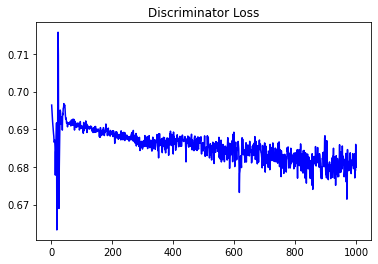

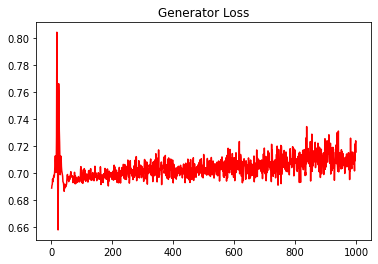

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4772709357015325


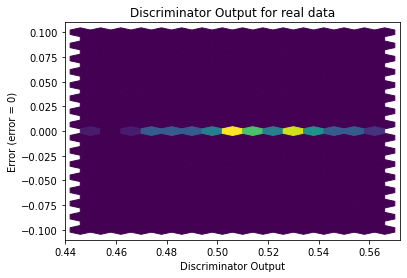

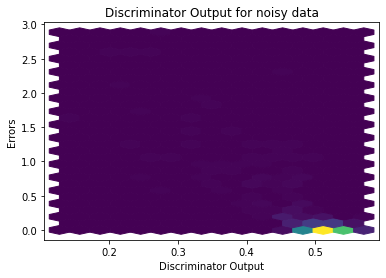

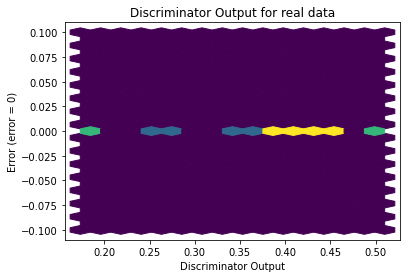

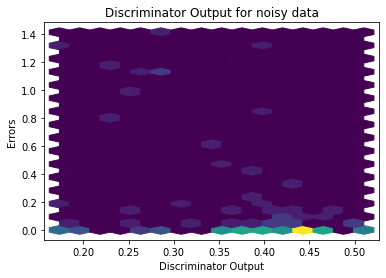

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


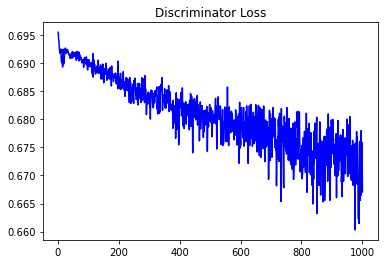

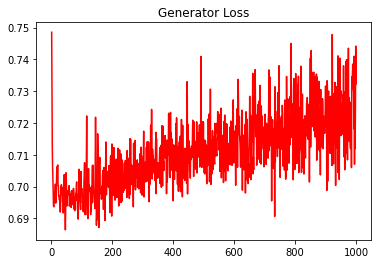

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5181439785105093


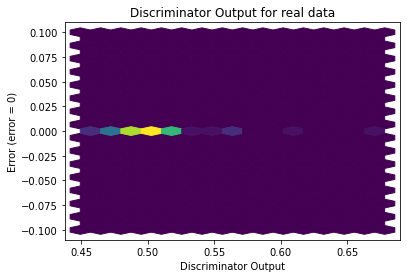

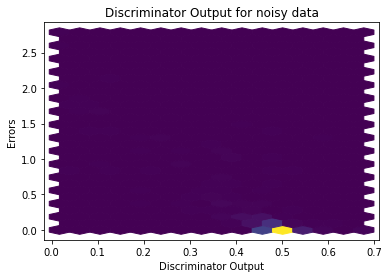

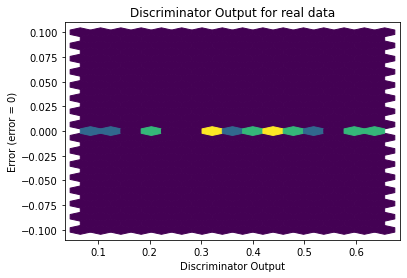

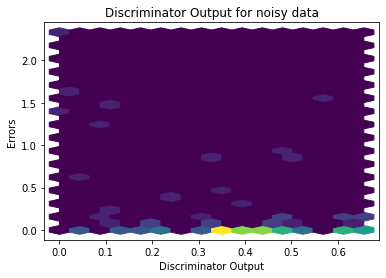

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4674]], requires_grad=True)
